<a href="https://colab.research.google.com/github/treasure823/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-Machine-Learning/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Unsupervised_Machine_Learning_Capstone_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Nidhi Pandey

# **Project Summary -**

**The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.**

**To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.**

**Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features.**

**Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

**After the clustering process, the results will be evaluated and interpreted. The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies.**

**Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.**

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company.**

# **GitHub Link -**

https://github.com/treasure823/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-Machine-Learning

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [103]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# Load Dataset
path = '/content/drive/MyDrive/Netflix Movies and TV Shows Clustering_Unsupervised Machine Learning_Capstone 4 _roject/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

### Dataset First View

In [106]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [107]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [108]:
df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Dataset Rows & Columns count

In [110]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [111]:
df.index

RangeIndex(start=0, stop=7787, step=1)

### Dataset Information

In [112]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [113]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [114]:
duplicates = len(df[df.duplicated()])
print(duplicates)

0


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [116]:
df.notnull().count()

show_id         7787
type            7787
title           7787
director        7787
cast            7787
country         7787
date_added      7787
release_year    7787
rating          7787
duration        7787
listed_in       7787
description     7787
dtype: int64

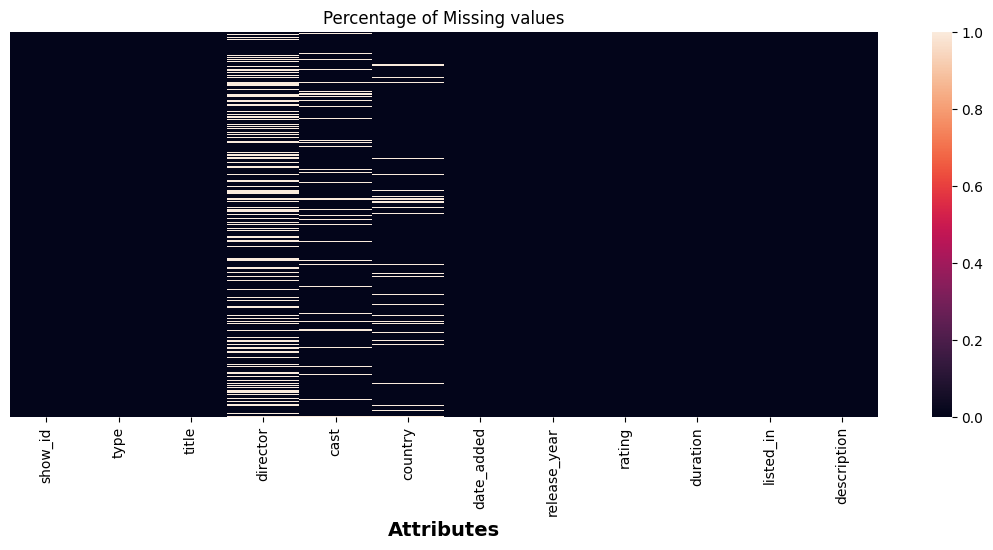

In [117]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

<Axes: >

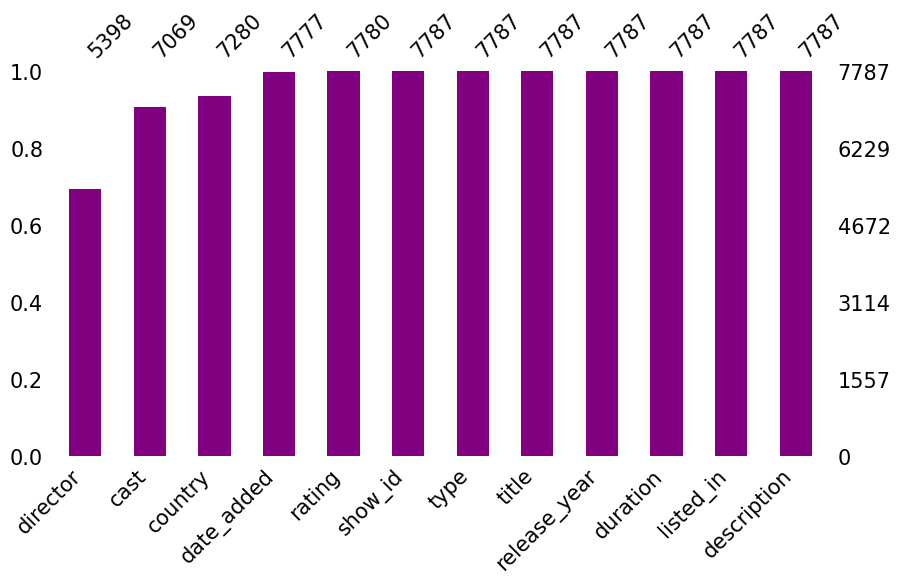

In [118]:
import missingno as msno
msno.bar(df, color='purple',sort='ascending', figsize=(10,5), fontsize=15)

In [119]:
# total number of null values in dataset
df.isnull().sum().sum()

3631

### What did you know about your dataset?

This dataset contains information about various TV shows of netflix about their director ,cast ,type ,release year ,duration and description.This dataset has 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [120]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [121]:
# Dataset Describe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

### Check Unique Values for each variable.

In [122]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [123]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


In [124]:
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [125]:

# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [136]:
a = df.copy()

In [137]:
a['listed_in'] = a.listed_in.apply(lambda row : row.split(','))
a.explode('listed_in')['listed_in'].unique

<bound method Series.unique of 0       International TV Shows
0                    TV Dramas
0          TV Sci-Fi & Fantasy
1                       Dramas
1         International Movies
                 ...          
7784          Music & Musicals
7785    International TV Shows
7785                Reality TV
7786             Documentaries
7786          Music & Musicals
Name: listed_in, Length: 17071, dtype: object>

In [138]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [141]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []

  for  word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))


df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

Streaming output truncated to the last 5000 lines.
 TV Dramas not present in dictionary
 Docuseries not present in dictionary
 Science & Nature TV not present in dictionary
 International Movies not present in dictionary
 Independent Movies not present in dictionary
 Thrillers not present in dictionary
 International Movies not present in dictionary
 International Movies not present in dictionary
 Faith & Spirituality not present in dictionary
 Dramas not present in dictionary
 Dramas not present in dictionary
 International Movies not present in dictionary
 Music & Musicals not present in dictionary
 Thrillers not present in dictionary
 International Movies not present in dictionary
 Thrillers not present in dictionary
 TV Comedies not present in dictionary
 TV Dramas not present in dictionary
 International Movies not present in dictionary
 Sports Movies not present in dictionary
 TV Comedies not present in dictionary
 Dramas not present in dictionary
 International Movies not presen

### What all manipulations have you done and insights you found?

We can gather the following insights from the dataset:

Director: There are missing values in the "Director" column.

Country: There are missing values in the "Country" column, which have been filled with zero.

Cast: There are missing values in the "Cast" column, which have been filled with "NAN."

Date Added: There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

Date_addded Column: In the "Date Added" column, additional information has been extracted such as the day, month, and year.

In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero. Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Histogram plot of release dates of shows/movies on Netflix**

<Figure size 1000x800 with 0 Axes>

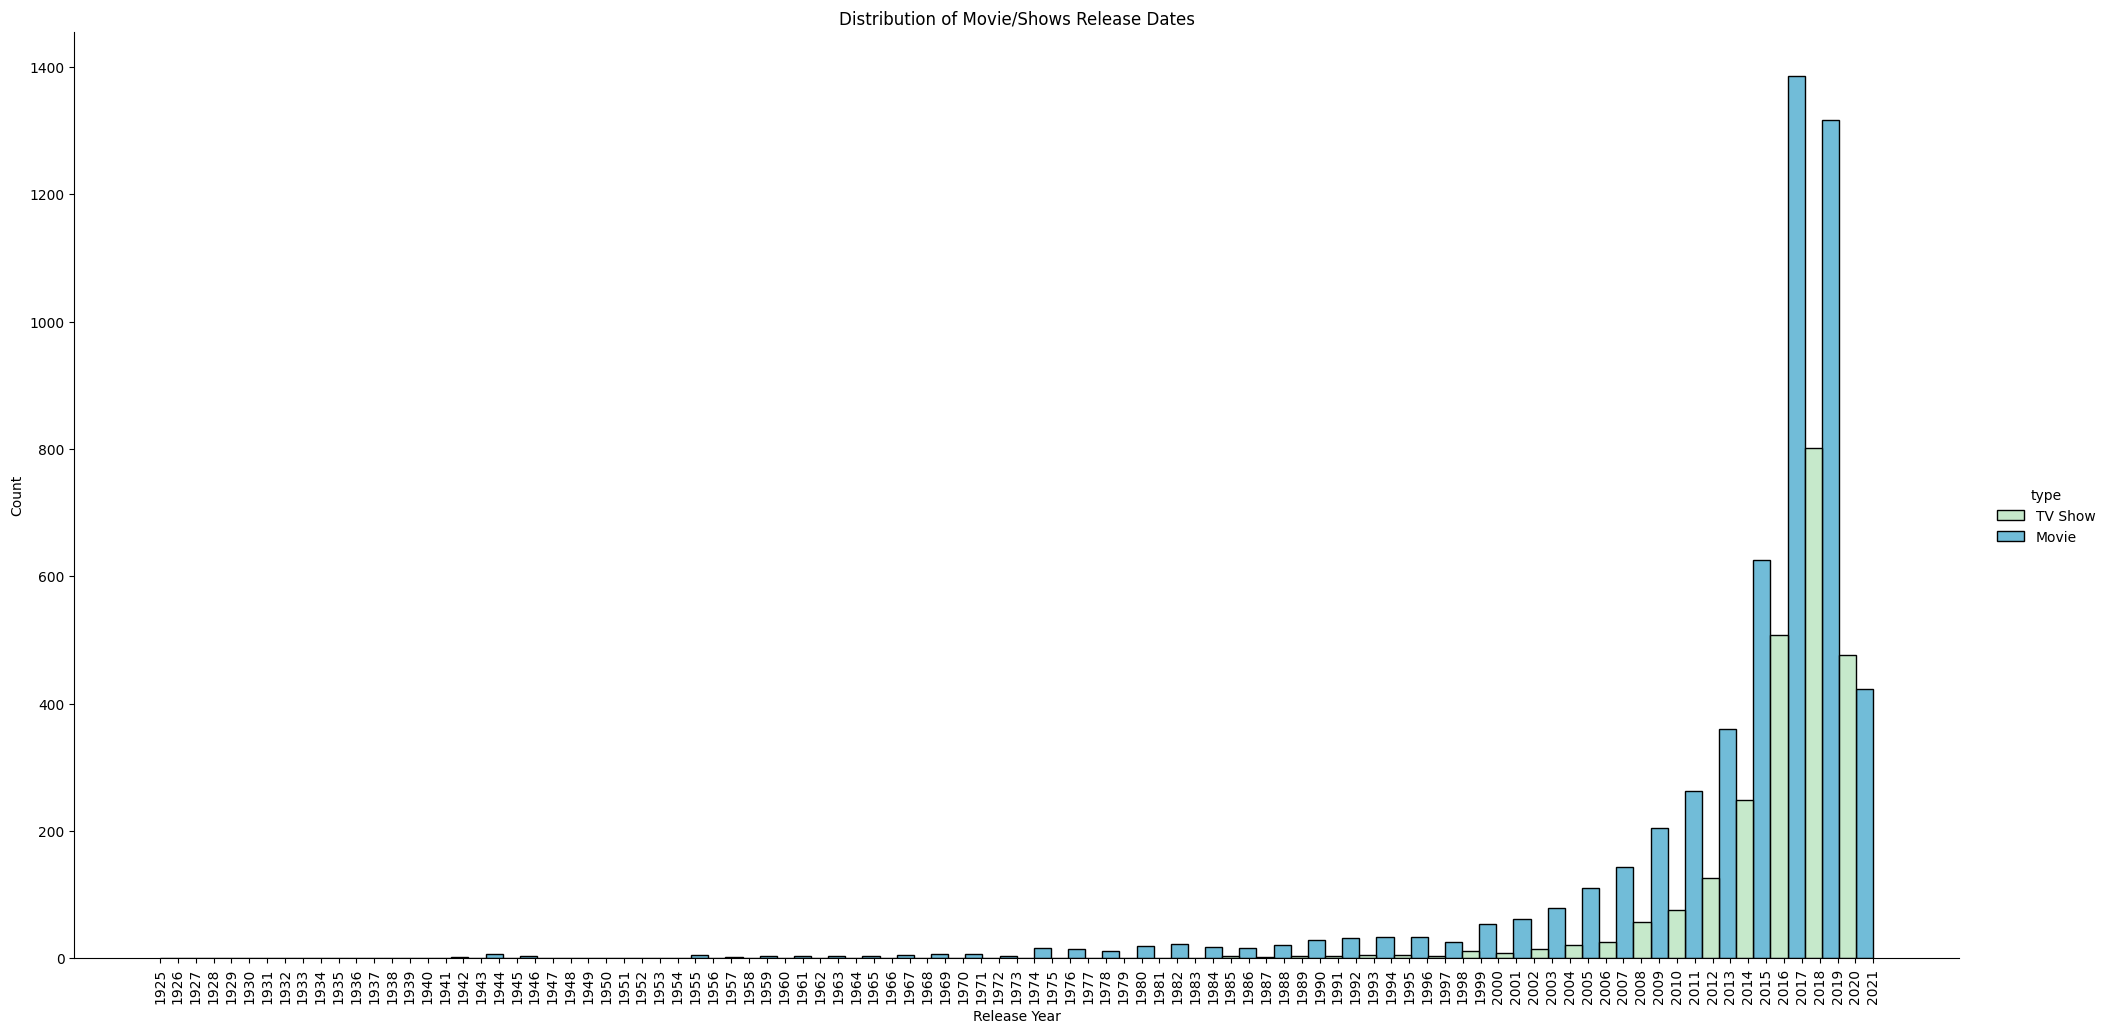

In [126]:
# Chart - 1 visualization code
a = plt.figure(figsize=(10,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

**The distplot is plotted using the distplot() function. The scatterplot displays the data distribution of a single variable in relation to the density distribution. The marine-born. The distplot() function returns the plot with the density distribution after accepting the data variable as an argument.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
> * **Most Movies streaming on the platform were released after 2010**
> * **Most  TV Shows streaming on the platform were released after 2015**
> * **The year 2017 had highest number of Movie and TV show releases on the platform**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 2
**Histogram plot of dates of number of shows/movies added by the Streaming giant**

<Figure size 1000x800 with 0 Axes>

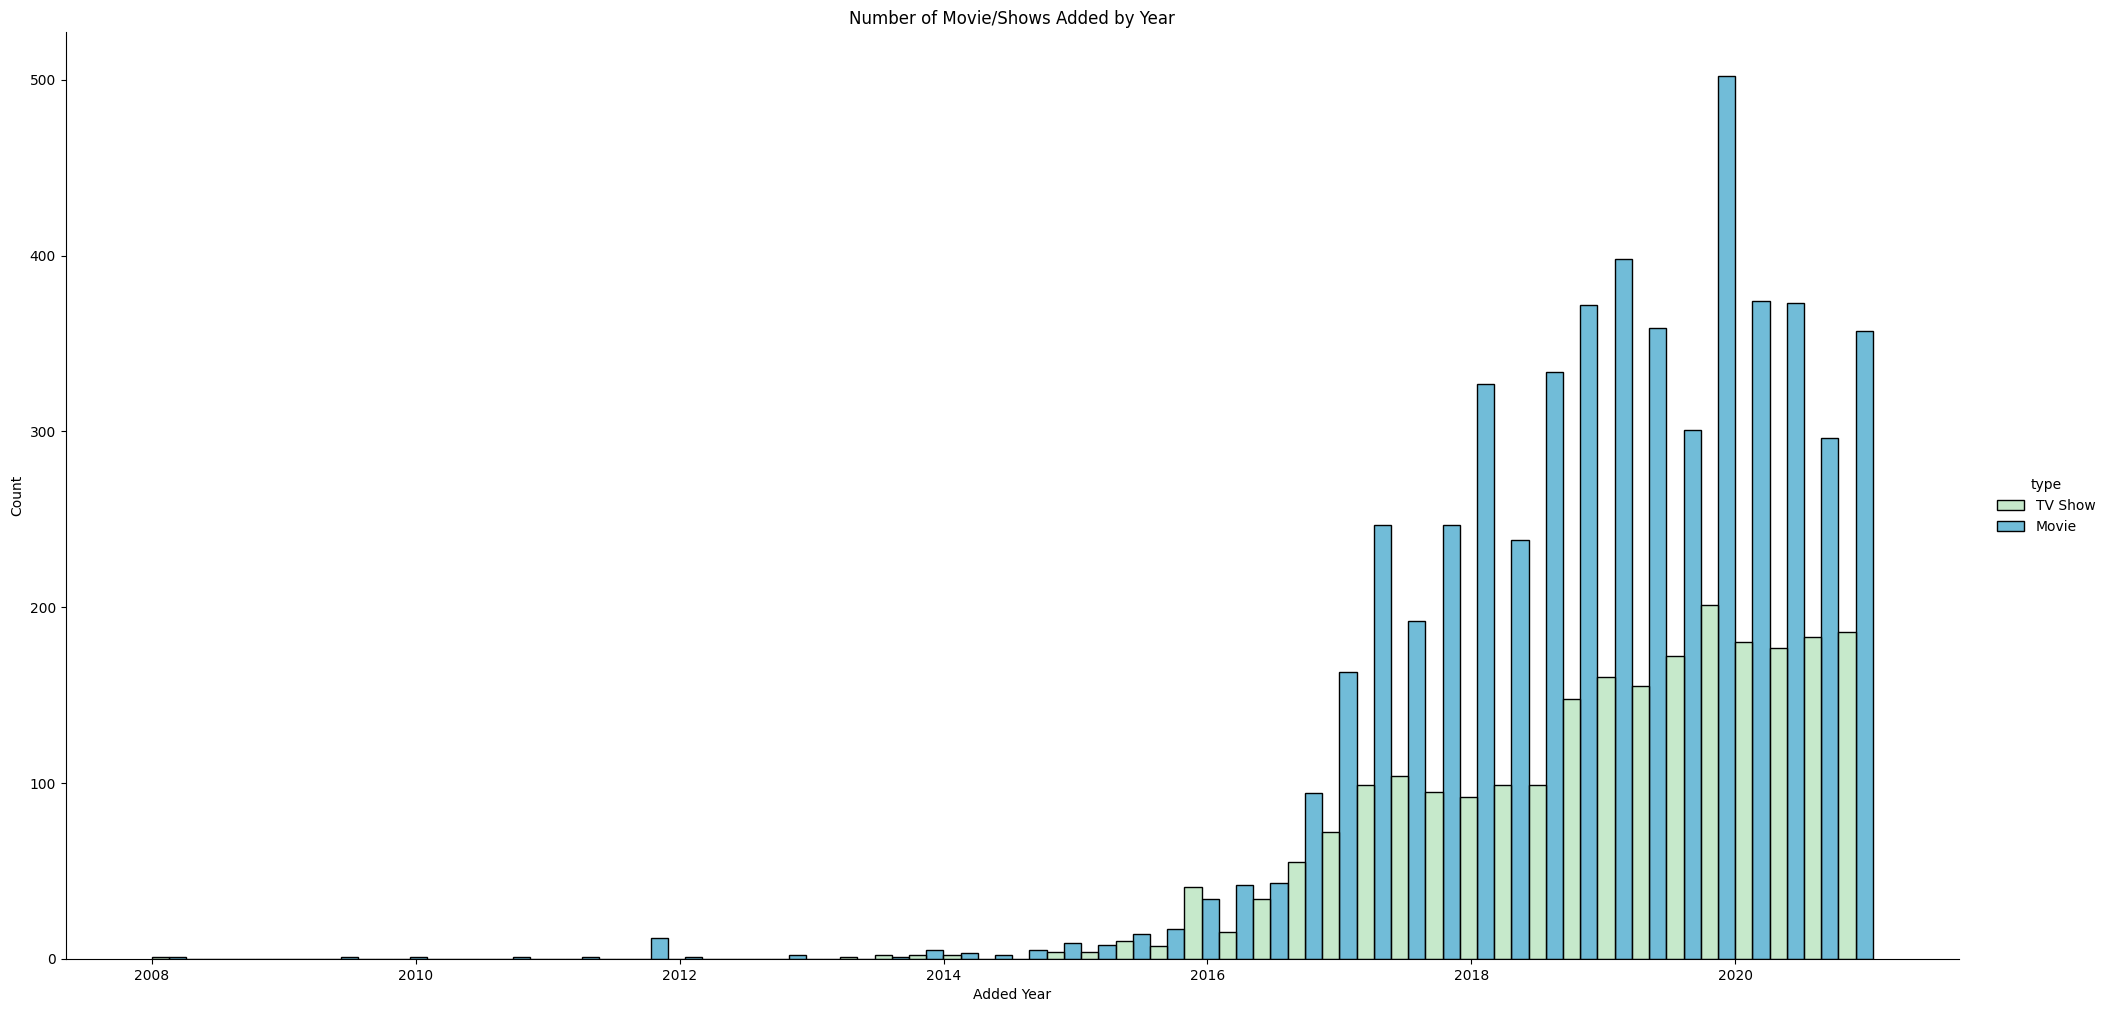

In [127]:
# Chart - 2 visualization code
a = plt.figure(figsize=(10,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')


##### 1. Why did you pick the specific chart?

**The distplot is plotted using the distplot() function. The scatterplot displays the data distribution of a single variable in relation to the density distribution. The marine-born. The distplot() function returns the plot with the density distribution after accepting the data variable as an argument.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**NO negative growth is promoted.**

#### Chart - 3

In [128]:
# Chart - 3 visualization code
labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

**I have  picked pie chart because this chart is very effective in visualizing the distribution of categorical data.**

##### 2. What is/are the insight(s) found from the chart?

**TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes it will provide the positive insight to the show bizz business.**

#### Chart - 4
**Type of Videos on Netflix**

In [129]:
# Chart - 4 visualization code
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

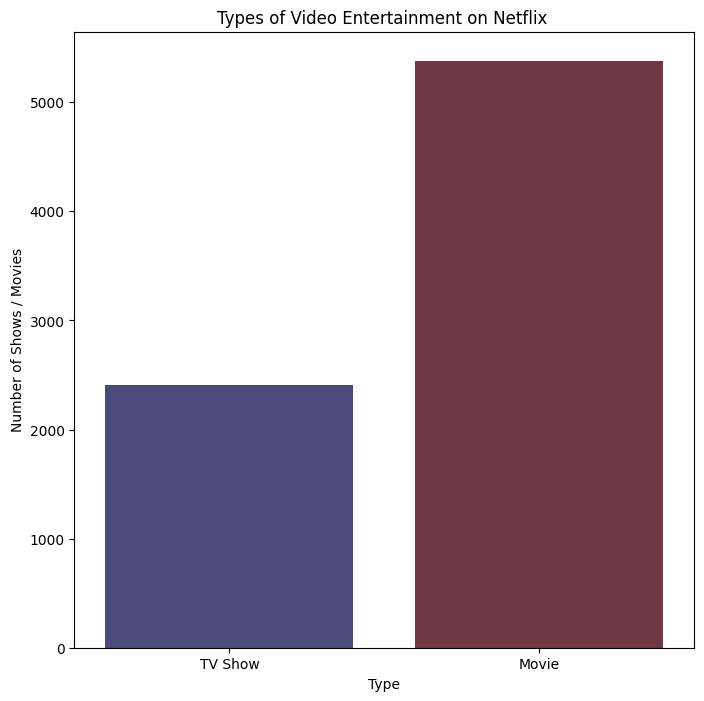

In [130]:
a = plt.figure(figsize=(8,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

##### 1. Why did you pick the specific chart?

**Countplot() method is used to Show the counts of observations in each categorical bin using bars.**

##### 2. What is/are the insight(s) found from the chart?

 * **There are almost twice as many movies as TV shows on Netflix.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 5
**Different Ratings On The  Platform**

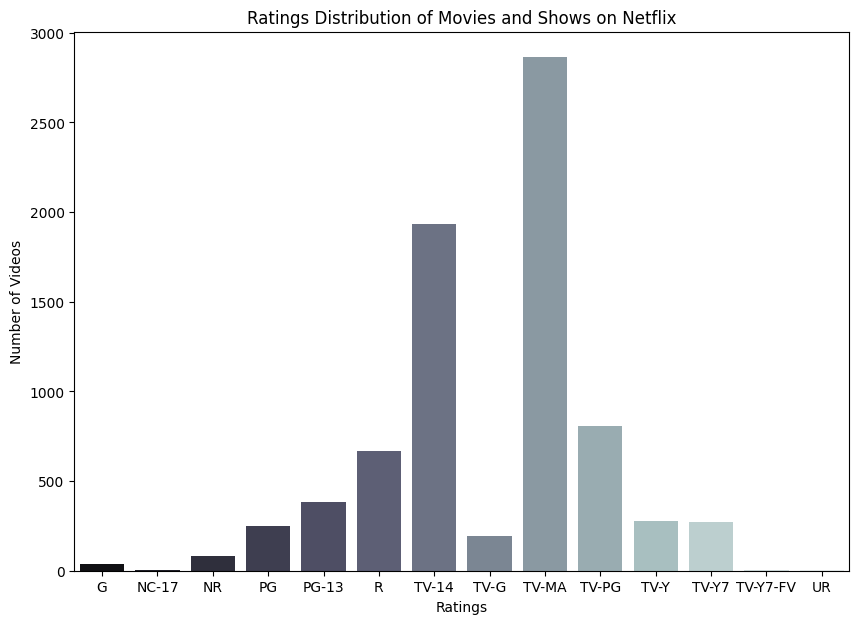

In [131]:
# Chart - 5 visualization code
a = plt.figure(figsize=(10,7))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x = d['rating'] ,y = d['show_id'], palette= 'bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

##### 1. Why did you pick the specific chart?

**Bar plots are a type of data visualization used to represent data in the form of rectangular bars. The height of each bar represents the value of a data point, and the width of each bar represents the category of the data.**

##### 2. What is/are the insight(s) found from the chart?

**Most content on Netflix is rated for Mature Audiences and over 14 years old.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart -  
**Content added over the year**

In [132]:
# Chart - 6 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

##### 1. Why did you pick the specific chart?

**Line When working on machine learning or data science projects, plot is one of the simplest and most fundamental graphical analysis tools that is crucial for data analysis. They are employed to convey a correlation between two variables.**

##### 2. What is/are the insight(s) found from the chart?

**The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 7

In [135]:
# Chart - 7 visualization code
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')


KeyError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
influential_features = ['show_id',  'date_added','release_year', 'rating', 'duration']


In [ ]:
df[influential_features].corr()

In [ ]:
sns.heatmap(df[influential_features].corr(),annot=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[influential_features],size=5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***